In [1]:
import pandas as pd

# Extraction

In [2]:
import urllib
import json
import pickle
import re

from threading import Thread
from collections import defaultdict

In [17]:
def extract_content(page):
    data = '[' + str(page) + ', {keyword: "", active: false, column: "", filter: ""}, none, true, "global"]'
    data = data.encode('utf-8')
#     print("Fetching data (page {})".format(i))
    req = urllib.request.Request(url, data)
    response = urllib.request.urlopen(req)
    content = response.read()
    parsed_content = json.loads(content)
    d = defaultdict(list)
    for player in parsed_content['success']["users"]:
        d["rank"].append(player["rank"])
        d["level"].append(player["codingamer"]["level"])
        
        pseudo = player.get("pseudo", "UNKNOWN")
        pseudo = s = re.sub(pattern, '*', pseudo)
        d["pseudo"].append(pseudo)
        
        d["userId"].append(player["codingamer"].get("userId", "UNKNOWN"))
        d["profile"].append(player["codingamer"]["publicHandle"])
        d["countryId"].append(player["codingamer"].get("countryId", "?"))
        d["achievements"].append(player["achievements"])
        d["clash"].append(player["clash"])
        d["codegolf"].append(player["codegolf"])
        d["contests"].append(player["contests"])
        d["multiTraining"].append(player["multiTraining"])
        d["optim"].append(player["optim"])
        d["score"].append(player["score"])
        d["xp"].append(player["xp"])
    df_local = pd.DataFrame(data=d)
    return df_local

In [3]:
# with open('current_page.pickle', 'wb') as f:
#     pickle.dump(1, f, pickle.HIGHEST_PROTOCOL)

In [19]:
url = "https://www.codingame.com/services/LeaderboardsRemoteService/getGlobalLeaderboard"
pattern = re.compile("[^\x20-\x7E\xA0-\xA3\xA5\xA7\xA9-\xB3\xB5-\xB7\xB9-\xBB\xBF-\xFF\u20AC\u0160\u0161\u017D\u017E\u0152\u0153\u0178]")
total_pages = 9802

try:
    with open('current_page.pickle', 'rb') as f:
        current_page = pickle.load(f)
except FileNotFoundError:
    current_page = 0
print("restart @", current_page)

df = pd.read_csv("ranking_global_{}.csv".format(i//1000), encoding="iso8859_15")

for i in range(current_page, total_pages+1):
    df_local = extract_content(i)
    df = df.append(df_local, ignore_index=True)
    if i % 10 == 0 or i == total_pages:
        idx = i // 1000
        df.to_csv("ranking_global_{}.csv".format(idx), header=True, index=False, encoding="iso8859_15")
        with open('current_page.pickle', 'wb') as f:
            pickle.dump(i+1, f, pickle.HIGHEST_PROTOCOL)
        print("saved @ {} pages".format(i))
print("Done")

restart @ 3021
saved @ 3030 pages
saved @ 3040 pages
saved @ 3050 pages
saved @ 3060 pages
saved @ 3070 pages
saved @ 3080 pages
saved @ 3090 pages
saved @ 3100 pages
saved @ 3110 pages
saved @ 3120 pages
saved @ 3130 pages
saved @ 3140 pages
saved @ 3150 pages
saved @ 3160 pages
saved @ 3170 pages
saved @ 3180 pages
saved @ 3190 pages
saved @ 3200 pages
saved @ 3210 pages
saved @ 3220 pages
saved @ 3230 pages
saved @ 3240 pages
saved @ 3250 pages
saved @ 3260 pages
saved @ 3270 pages
saved @ 3280 pages
saved @ 3290 pages
saved @ 3300 pages


KeyboardInterrupt: 

In [13]:
df_local

,achievements,clash,codegolf,contests,countryId,level,multiTraining,optim,profile,pseudo,rank,score,userId,xp
0,595,0,12,0,DE,6,0,0,bc10403375577cb636936a6f1a5d60928545002,Iead,50909,12.0,2005458,595
1,495,0,0,0,FR,6,12,0,0198ccf0e0ad5adaa129e8ba7c71cca49793102,Ruijan,50909,12.0,2013979,595
2,555,0,0,8,RU,6,4,0,91eb2889188aad2049f4d290d819447e279095,serggiuss,50909,12.0,590972,590
3,575,0,12,0,GB,6,0,0,067d4dc6e075d89ef3a2d6b68b5314a82192701,UNKNOWN,50909,12.0,1072912,585
4,530,0,0,12,TR,6,0,0,112b6629ef545f77513cef817bb2f1e91424841,nadirg,50909,12.0,1484241,585
5,425,0,0,3,PT,6,9,0,06c782022742a8ac2e8f118bc64dcce39252071,Barbarrosa,50909,12.0,1702529,580
6,540,0,12,0,FR,6,0,0,e532a3cc5942c611c71142376d0b6c3f1638911,Potterr,50909,12.0,1198361,575
7,440,0,0,0,GB,6,12,0,08f93f2b30b4bcf057dab41b0c6441d06236721,Matt59,50909,12.0,1276326,575
8,440,0,0,0,IS,6,12,0,6aab0d6edd76b4f630fdf9a3a74eb9718645001,JonSigmundsson,50909,12.0,1005468,575
9,440,0,0,0,HU,6,12,0,83292b11f603fefe31052eef0322fae5140659,aperyon,50909,12.0,956041,575


# Test multithreading

In [3]:
class Extracteur(Thread):
    def __init__(self, start, stop, ID):
        Thread.__init__(self)
        self.ID = ID
        self.starting_pts = start
        self.stop = stop
        self.restarting_step = self.load_status()
        self.df = pd.read_csv("ranking_global_{}.csv".format(self.ID), encoding="iso8859_15")

    def run(self):
        for page in range(self.restarting_step, self.stop+1):
            df_local = self.extract_content(page)
            self.df = self.df.append(df_local, ignore_index=True)
            if page % 10 == 0 or page == self.stop:
                self.df.to_csv("ranking_global_{}.csv".format(self.ID), header=True, index=False, encoding="iso8859_15")
                with open('extracteur_{}.pickle'.format(self.ID), 'wb') as f:
                    pickle.dump(i+1, f, pickle.HIGHEST_PROTOCOL)
            
    def extract_content(self, page):
        data = '[' + str(page) + ', {keyword: "", active: false, column: "", filter: ""}, none, true, "global"]'
        data = data.encode('utf-8')
        print("Query page", page)
        req = urllib.request.Request(url, data)
        response = urllib.request.urlopen(req)
        content = response.read()
        parsed_content = json.loads(content)
        d = defaultdict(list)
        for player in parsed_content['success']["users"]:
            pseudo = player.get("pseudo", "UNKNOWN")
            pseudo = s = re.sub(pattern, '*', pseudo)
            d["rank"].append(player["rank"])
            d["level"].append(player["codingamer"]["level"])
            d["pseudo"].append(pseudo)
            d["userId"].append(player["codingamer"].get("userId", "UNKNOWN"))
            d["profile"].append(player["codingamer"]["publicHandle"])
            d["countryId"].append(player["codingamer"].get("countryId", "?"))
            d["achievements"].append(player["achievements"])
            d["clash"].append(player["clash"])
            d["codegolf"].append(player["codegolf"])
            d["contests"].append(player["contests"])
            d["multiTraining"].append(player["multiTraining"])
            d["optim"].append(player["optim"])
            d["score"].append(player["score"])
            d["xp"].append(player["xp"])
        df_local = pd.DataFrame(data=d)
        return df_local
    
    def load_status(self):
        try:
            with open('extracteur_{}.pickle'.format(self.ID), 'rb') as f:
                current_page = pickle.load(f)
        except FileNotFoundError:
            current_page = self.starting_pts
        return current_page

In [ ]:
url = "https://www.codingame.com/services/LeaderboardsRemoteService/getGlobalLeaderboard"
pattern = re.compile("[^\x20-\x7E\xA0-\xA3\xA5\xA7\xA9-\xB3\xB5-\xB7\xB9-\xBB\xBF-\xFF\u20AC\u0160\u0161\u017D\u017E\u0152\u0153\u0178]")
total_pages = 9802

thread_1 = Extracteur(1, 1000, 1)
thread_2 = Extracteur(1001, 2000, 2)
thread_3 = Extracteur(2001, 3000, 3)
thread_4 = Extracteur(3001, 4000, 4)
thread_5 = Extracteur(4001, 5000, 5)
thread_6 = Extracteur(5001, 6000, 6)
thread_7 = Extracteur(6001, 7000, 7)
thread_8 = Extracteur(7001, 8000, 8)
thread_9 = Extracteur(8001, 9000, 9)
thread_10 = Extracteur(9001, total_pages, 10)

thread_1.start()
thread_2.start()
thread_3.start()
thread_4.start()
thread_5.start()
thread_6.start()
thread_7.start()
thread_8.start()
thread_9.start()
thread_10.start()

thread_1.join()
thread_2.join()
thread_3.join()
thread_4.join()
thread_5.join()
thread_6.join()
thread_7.join()
thread_8.join()
thread_9.join()
thread_10.join()

Query page 1
Query page 1001
Query page 2001Query page
 Query page3001 
4001
Query page 5001
Query page 6001
Query pageQuery pageQuery page   900170018001


Query page 2
Query page 1002
Query page 5002
Query page 9002
Query page 6002
Query page 7002
Query page 4002
Query page 3
Query page 3002
Query page 8002
Query page 1003
Query page 2002


# Analyse

In [111]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [107]:
df = pd.read_csv("ranking.csv", encoding="iso8859_15")

In [170]:
sub_df = df[df["score"]>0]
sub_df = sub_df[sub_df["pseudo"] != "UNKNOWN"]
sub_df = sub_df[sub_df["achievements"] < sub_df["xp"]]

In [171]:
sub_df

,achievements,clash,codegolf,contests,countryId,level,multiTraining,optim,profile,pseudo,rank,score,userId,xp
0,14840,0,2939,20536,FR,38,36595,4250,3799c30a7f390b64b9430ff53613309e489451,Royale,1,64320.0,154984,37225
1,11390,0,2332,20051,FR,36,37339,4228,6db919e4cba28b42e343a3f3d36d2768260153,Neumann,2,63950.0,351062,33155
2,17545,0,2492,18744,FR,39,37571,4055,1724dffd64c8c26c9fa9a189691387b5760508,Magus,3,62862.0,805067,41529
3,12160,0,1343,16167,FR,34,31457,3013,f30988de96c9c80005a6f5ec0986922f0411701,BeberLeNewbie,4,51980.0,1071140,28370
4,13305,0,2549,16293,FR,35,28585,3610,40a6e8f95014d9402dd909b0f729290d384688,R4N4R4M4,5,51037.0,886483,31196
5,1120,0,0,17323,FR,28,31114,810,59c27936dbb3cdb9bfecd7e3456ecc5c825622,Manwe,6,49247.0,226528,18400
6,13485,0,1676,13581,FR,35,29471,3367,b282f3812c90f2876848d5ce7829df0b847304,[CG]SaiksyApo,7,48095.0,403748,31818
7,1475,0,24,12815,FR,27,31983,2251,f5f8fd68a484329ecd629d610c8d05755689841,EricSMSO,8,47073.0,1489865,16530
8,13190,0,284,15258,FR,33,26428,3079,6cb3347803debcfe217e0c2ee03008588207231,FredericBautista,9,45049.0,1327028,26851
9,7045,0,190,18208,FR,32,24927,747,9afa6899fee419ca466331230cbf1aa2459533,nmahoude,10,44072.0,335954,25627


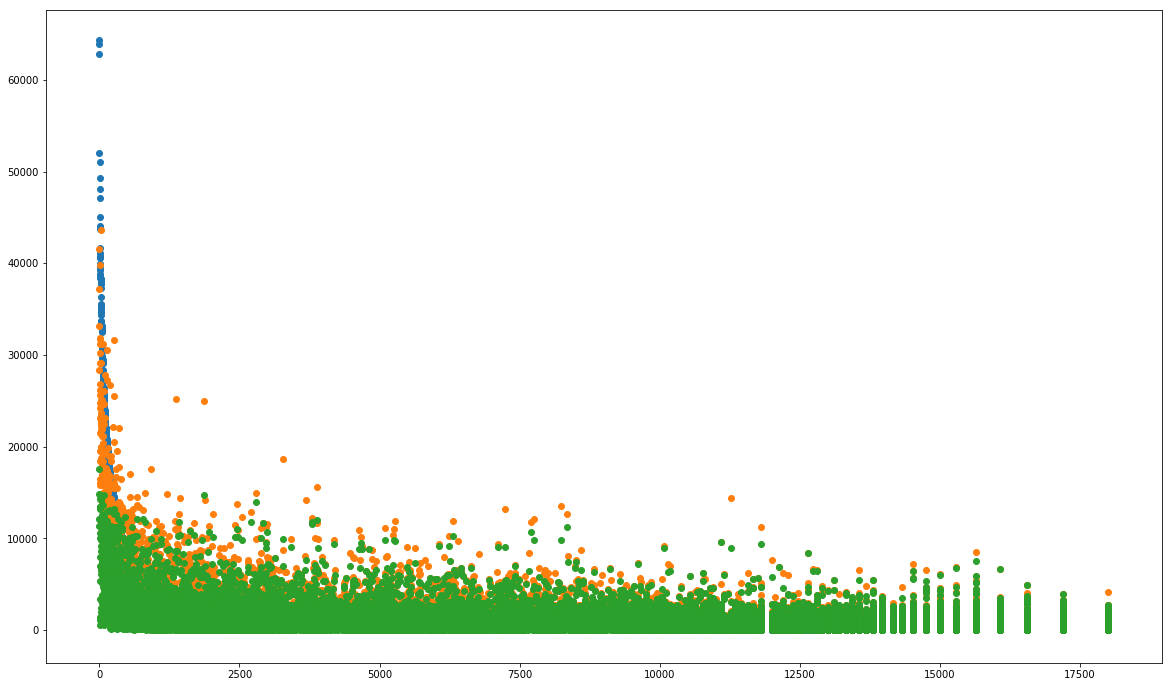

In [193]:
plt.figure(figsize=(20,12))
plt.scatter(sub_df["rank"], sub_df["score"])
# plt.scatter(sub_df["rank"], sub_df["xp"])
# plt.scatter(sub_df["rank"], sub_df["achievements"])
plt.show()

In [173]:
a = sub_df["score"].tolist()

In [174]:
sum(a[:len(a)//5]) / sum(a)

0.8650344668511771

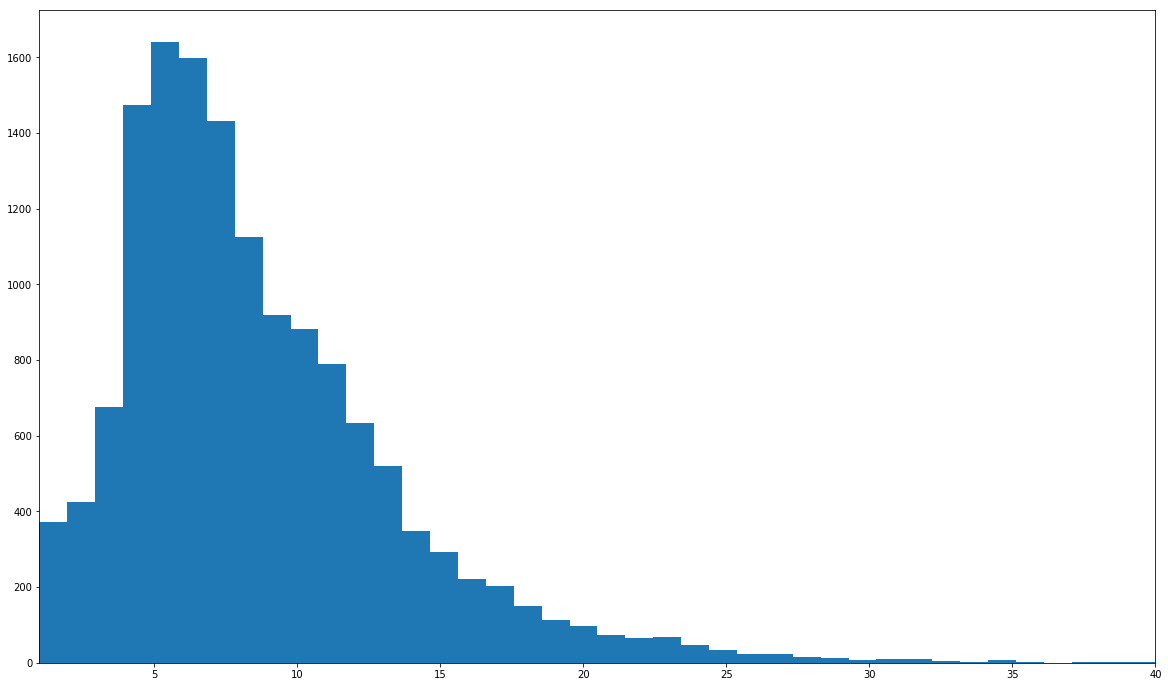

In [180]:
bins = max(df[df["score"]>10]["level"].unique())
plt.figure(figsize=(20,12))
plt.hist(df[df["score"]>10]["level"], bins=bins)
plt.xlim(1, bins)
plt.show()

In [186]:
sub_df["countryId"].value_counts()

FR    16255
Name: countryId, dtype: int64

In [188]:
sub_df[sub_df["pseudo"] == "Coni"]

,achievements,clash,codegolf,contests,countryId,level,multiTraining,optim,profile,pseudo,rank,score,userId,xp
700,7315,2351,38,1484,FR,25,2034,799,de015f1a510d60cdcd0551896a34c709188072,Coni,701,6706.0,270881,13478
